Assignment (Capstone Project)

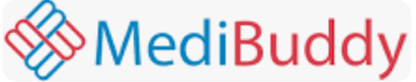

MediBuddy is a digital healthcare platform for an inpatient hospitalization, outpatient 
services, and corporate wellness benefits.

Analysis along with the machine learning code:

Github Link:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline

In [ ]:
df1 = pd.read_csv('/Medibuddy Insurance Data Price.csv')
df1.head()

,Policy no.,Age,Sex,Bmi,Charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [ ]:
df1.shape

(1338, 5)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   Age             1338 non-null   int64  
 2   Sex             1338 non-null   object 
 3   Bmi             1338 non-null   float64
 4   Charges in INR  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


In [ ]:
df1.describe()

,Age,Bmi,Charges in INR
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [ ]:
df1.isnull().sum()

,0
Policy no.,0
Age,0
Sex,0
Bmi,0
Charges in INR,0


In [ ]:
df2 = pd.read_csv('/Medibuddy Insurance Data Personal details.csv')

In [ ]:
df2.head()

,Policy no.,Children,Smoker,Region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [ ]:
df2.shape

(1338, 4)

In [ ]:
df2.describe()

,Children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [2]:
merged = pd.read_excel("C:/Projects/internproj/week4/Merged_Data.xlsx")

In [3]:
merged

,Policy no.,children,smoker,region,age,sex,bmi,charges
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC156898,0,yes,southwest,19,female,27.900,16884.92400
2,PLC157033,1,no,southwest,19,male,24.600,1837.23700
3,PLC156907,1,no,southeast,18,male,33.770,1725.55230
4,PLC157060,0,no,southwest,56,male,40.300,10602.38500
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


In [ ]:
merged.columns

Index(['Policy no.', 'Age', 'Sex', 'Bmi', 'Charges in INR', 'Children',
       'Smoker', 'Region'],
      dtype='object')

In [ ]:
merged.isnull().sum()

,0
Policy no.,0
Age,0
Sex,0
Bmi,0
Charges in INR,0
Children,0
Smoker,0
Region,0


In [ ]:
merged.Sex.value_counts()

,count
Sex,
male,676
female,662


In [ ]:
merged.groupby('Sex')['Charges in INR'].mean()

,Charges in INR
Sex,
female,12569.578844
male,13956.751178


In [ ]:
merged['Charges in INR'].mean()

13270.422265141257

### **1.Does the gender of the person matter for the company as a constraint for extending policies?**

In [25]:
#to find the count
merged.Sex.value_counts()

,count
Sex,
male,676
female,662


In [26]:
#to find the mean
merged.groupby('Sex')['Charges in INR'].mean()

,Charges in INR
Sex,
female,12569.578844
male,13956.751178


<Axes: xlabel='Sex', ylabel='Charges in INR'>

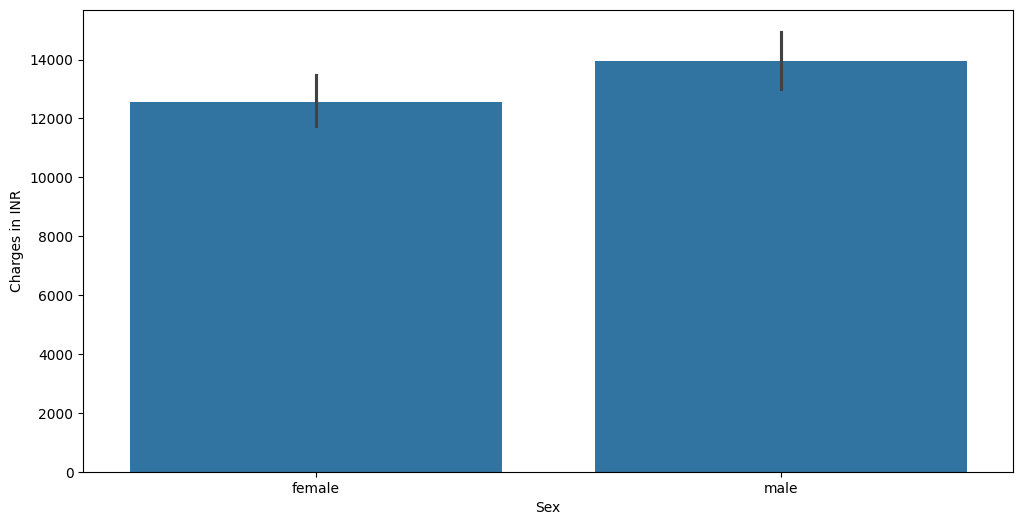

In [27]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'Sex', y = 'Charges in INR', data = merged)

* Observation : The gender is not a constraint for the company to give a policy or not since nearly equal number of policies have been handed out to both the genders

* However, a slight difference can be seen in terms of cost incurred by caculating the mean cost for both sexes.

Sex average charges in INR female 12569.578844 male 13956.751178

* Making the medical policy for men 11.03 % more expensive than women.



In [28]:
(13956 - 12569) / 12569

0.11035086323494311

### **2. What is the average amount of money the company spent over each policy cover?**

In [29]:
merged['Charges in INR'].mean()

13270.422265141257

### **3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?**


In [30]:
merged.Region.value_counts()

,count
Region,
southeast,364
southwest,325
northwest,325
northeast,324


* Observation : The above data concludes that the most policies are bought from the southeast region but even then, the difference is not considerably huge.

### **4. Does the no. of dependents make a difference in the amount claimed?**


<Axes: xlabel='Children', ylabel='Charges in INR'>

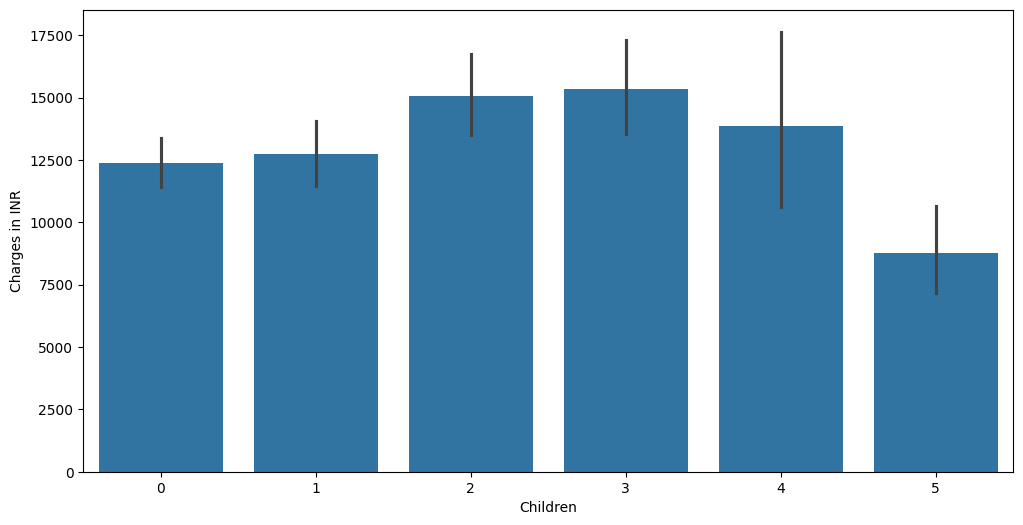

In [31]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'Children', y = 'Charges in INR', data = merged)

* Observation : The data does not tell us the amount claimed by the individuals. Though we can infer a subtle increase in the charges in INR with increasing children but that starts to fall after the number of children crosses 3. thus the info is not sufficient for us to make deductions about the calculation of the amount of claim.


### **5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?**

<Axes: xlabel='Bmi', ylabel='Charges in INR'>

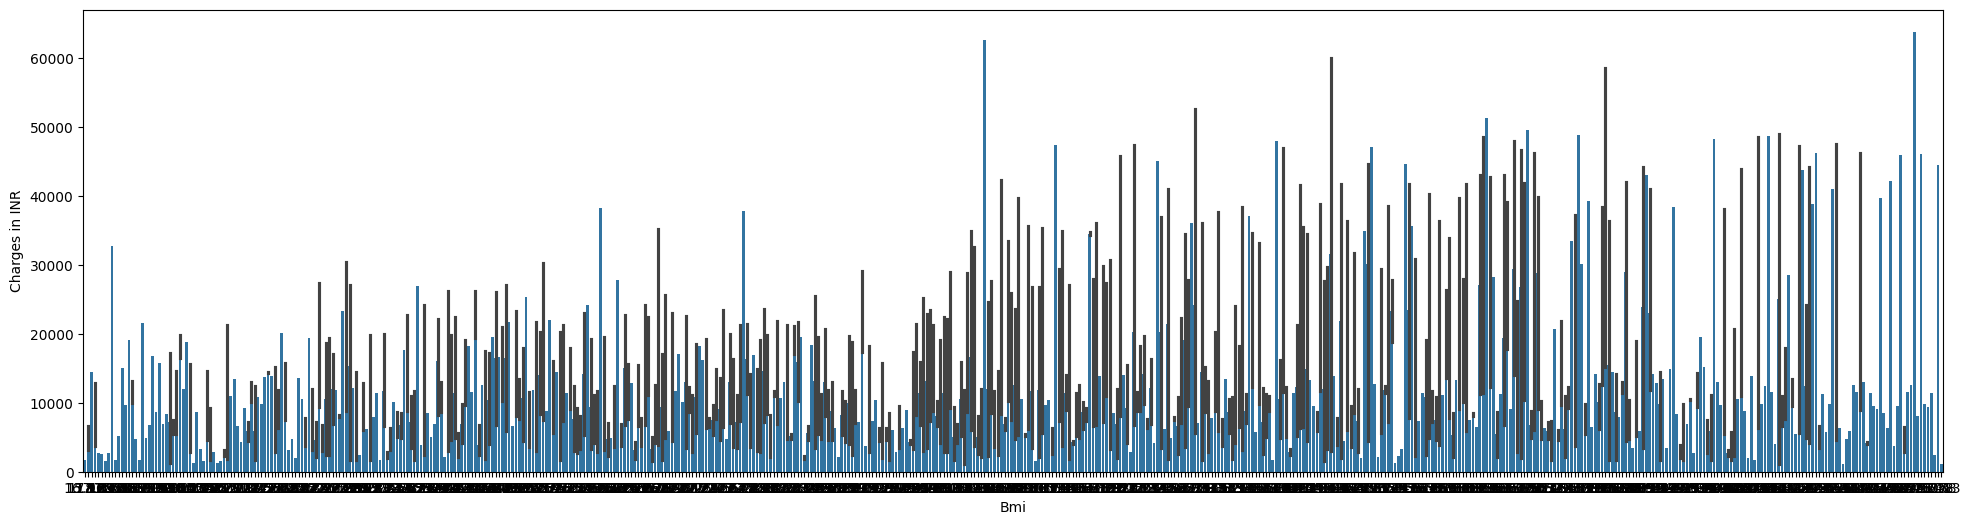

In [32]:
matplotlib.rcParams['figure.figsize'] = (24,6)
sns.barplot(x = 'Bmi', y = 'Charges in INR', data = merged)

* Observation : Though we can't conclude a rigid, linear trend but on the larger scale, it seems that the cost incurred increases with the bmi. This happens with the exception of a few dips probably where the bmi falls in the category : healthy weight.

### **6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?**


In [35]:
#to find the number Smoker and non-smoker count
merged.Smoker.value_counts()

,count
Smoker,
no,1064
yes,274


<Axes: xlabel='Smoker', ylabel='Charges in INR'>

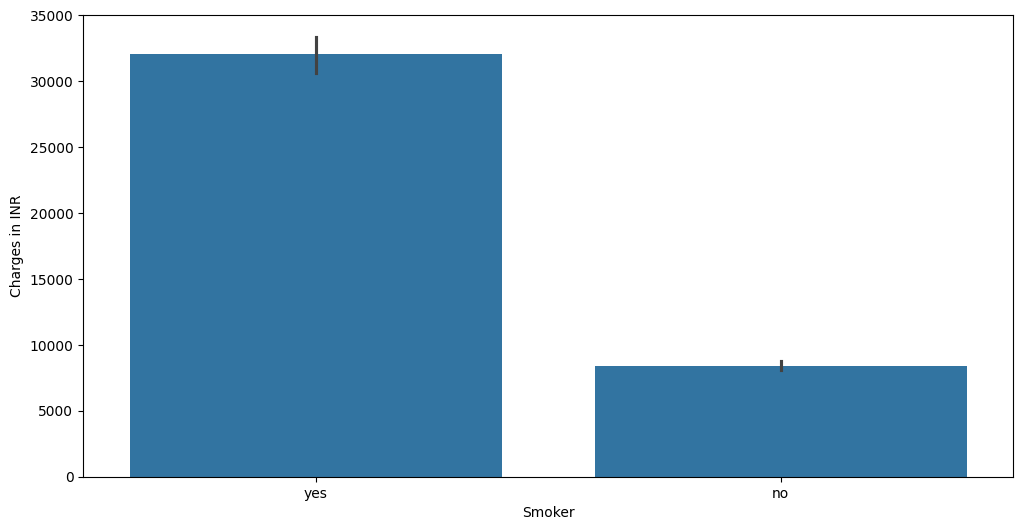

In [36]:
#depiction of the difference of the charges in INR paid by a smoker and non-smoker
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'Smoker', y = 'Charges in INR', data = merged)

In [37]:
merged.groupby('Smoker')['Charges in INR'].mean()

,Charges in INR
Smoker,
no,8434.268298
yes,32050.231832


In [38]:
8434 / 32050

0.26315132605304214

*  Observation : Only 20.47% user's are smokers in the given data and most of the people who bought the policy are non-smokers. Also, on an average smoker pays ---> 32050.231832, whereas non-smoker only pays ---> 8434.268298
*  This means a non-smoker on an average only has to pay 26.315 of what smokers for the same policy.



### 7. Does age have any barrier on the insurance claimed?

<Axes: xlabel='Age', ylabel='Charges in INR'>

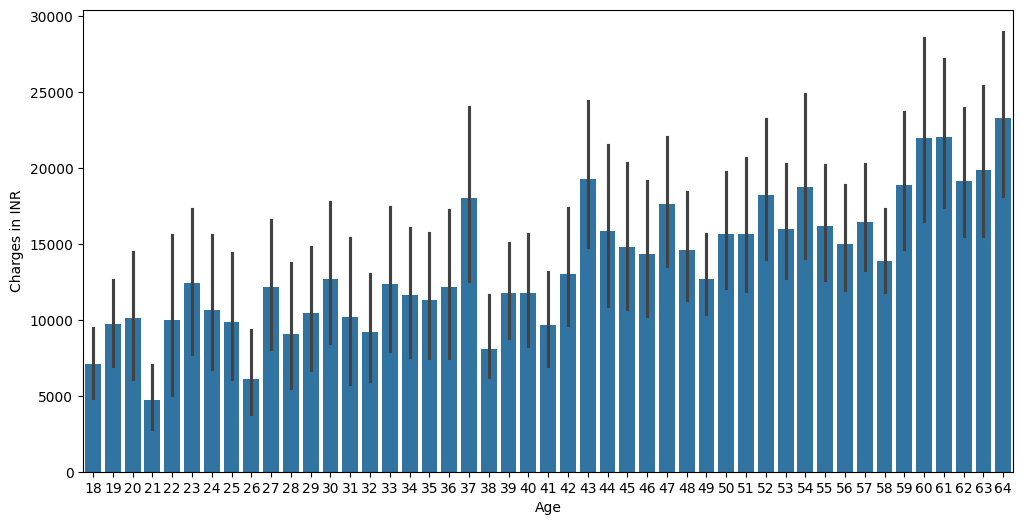

In [39]:
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'Age', y = 'Charges in INR', data = merged)

In [40]:
merged.groupby('Age')['Charges in INR'].mean()

,Charges in INR
Age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309


* Observation: The data is insufficient to deduce/conclude any analysis on the claims. But over the long interval of time, people with more age tends to pay more charges.

### 8. Can the company extend certain discounts after checking the health status (BMI) in this case?

In [41]:
merged.groupby('Age')['Charges in INR'].median()

,Charges in INR
Age,
18,2198.189850
19,2135.891875
20,2459.720100
21,2254.423600
22,2641.155700
23,3594.538000
24,3045.137650
25,3750.148925
26,3388.882175


<Axes: xlabel='Bmi', ylabel='Charges in INR'>

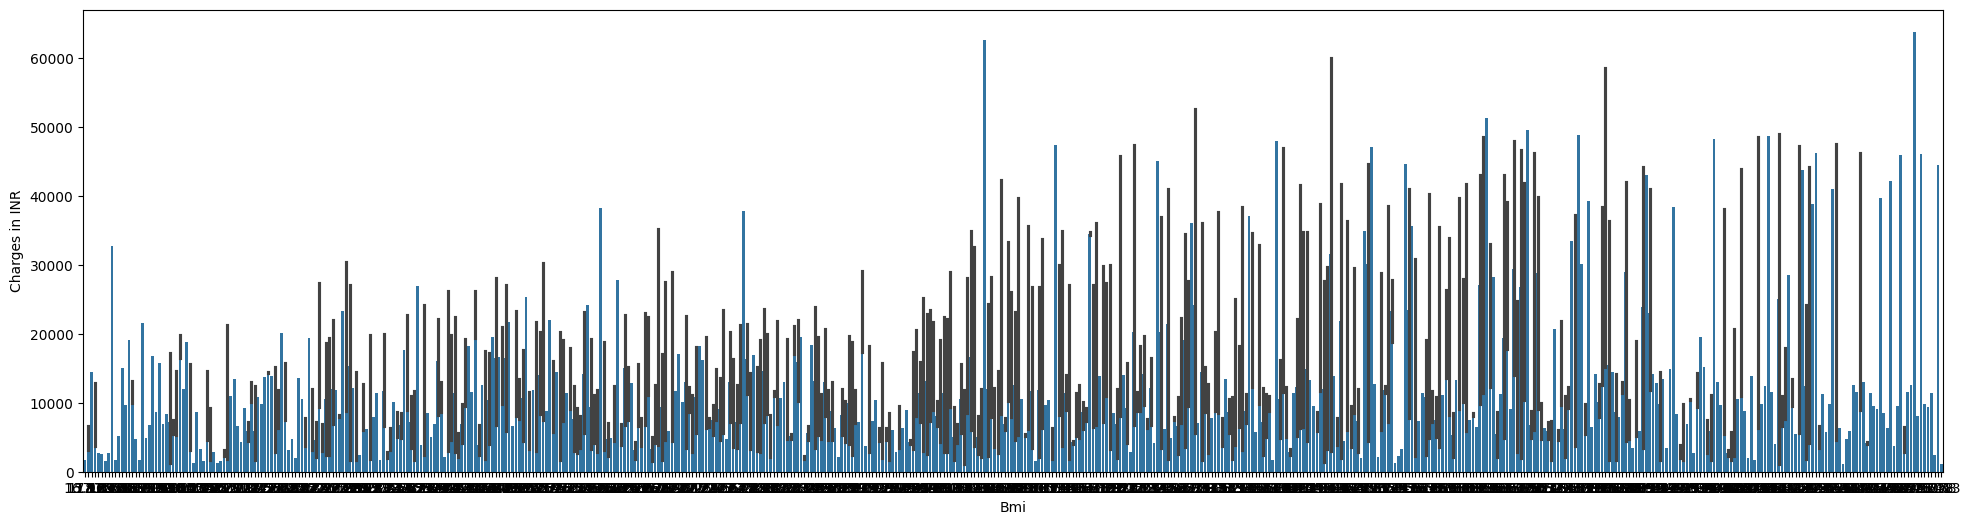

In [42]:
matplotlib.rcParams['figure.figsize'] = (24,6)
sns.barplot(x = 'Bmi', y = 'Charges in INR', data = merged)

* Observation: As per graph, on a mild scale the Charges in INR tends to increase with the Bmi, With the exception Bmi falls in the category of : Healthy weight, the charges reduces too company may providing larger discounts too younger people and smaller discounts to older people.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Drop 'Policy no.' as it's just an identifier
df_model = merged.drop(columns=['Policy no.'])

# Define features and target
X = df_model.drop(columns='charges')
y = df_model['charges']

# Categorical and numerical columns
categorical_cols = ['smoker', 'region', 'sex']
numerical_cols = ['age', 'bmi', 'children']

# Preprocessor: one-hot encode categoricals and scale numericals
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for both models
lr_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train both models
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate
results = {
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [
        mean_squared_error(y_test, y_pred_lr, squared=False),
        mean_squared_error(y_test, y_pred_rf, squared=False)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_rf)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model         RMSE  R2 Score
0  Linear Regression  6035.934983  0.778701
1      Random Forest  4830.153427  0.858286


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


---

### 📌 **Model Selection Justification & Explanation**

In this project, we aim to predict **medical insurance charges** based on customer features like age, BMI, smoking status, number of children, etc. Since our target variable (`charges`) is a continuous numerical value, this is a **regression problem**.

To tackle this, we selected **two complementary machine learning models**:

---

### 🔹 1. **Linear Regression**

#### ✅ Why We Chose It:
- It's a **simple, interpretable baseline model**.
- Helps us understand the **linear relationship** between features and charges.
- It's fast to train and provides a good reference point for comparing more complex models.

#### ⚙️ How It Works:
- Linear Regression models the target as a **weighted sum of input features**.
- It finds the best-fitting straight line (or hyperplane) through the data that **minimizes the mean squared error**.
- Example: it tells us how much `charges` increase on average for each unit increase in `age` or `BMI`, holding other variables constant.

---

### 🔹 2. **Random Forest Regressor**

#### ✅ Why We Chose It:
- It's a **powerful, non-linear model** that captures complex relationships in the data.
- It handles **interactions between features** automatically.
- It’s **robust to outliers** and doesn’t assume linearity like linear regression does.

#### ⚙️ How It Works:
- Random Forest is an **ensemble of decision trees** trained on random subsets of the data and features.
- Each tree makes a prediction, and the forest outputs the **average of all predictions**.
- This helps reduce overfitting and improves generalization compared to a single decision tree.

---

### 📈 Summary:

| Model               | Strengths                                                                 | Assumptions         |
|--------------------|---------------------------------------------------------------------------|---------------------|
| **Linear Regression**   | Simple, fast, interpretable; good baseline                             | Assumes linearity   |
| **Random Forest**       | Captures complex patterns; robust to noise and outliers                | No strict assumptions |

By comparing both models, we benefit from both **interpretability** and **performance**, helping us make informed decisions while also achieving accurate predictions.

---
